## Defining the Question

**Predict individuals that are most likely to have or use a bank account**

### Metric for success

**Model that will provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.**

#### The Context

Currently, financial inclusion is a barrier to economic and human development in Africa. In Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account. Access to bank accounts has been regarded as an indicator of financial inclusion.

#### Experimental desing


The experimental approach that will be used in this analysis include exploratory data analysis, univariate analysis, bivariate analysis and multivariate data analysis

#### Data Validation

In [4]:
financial_df.describe()


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [5]:
test_df.describe()

,year,household_size,age_of_respondent
count,10086.000000,10086.000000,10086.000000
mean,2016.975907,3.778802,38.308348
std,0.847356,2.212721,16.270053
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,20.000000,100.000000


**After examining the financialdataset.csv and the test.csv from kaggle.com,there was a correlation in the standard deviations  of the two datasets showing that our data was valid**

#### Importing the necessary libraries that we would use

In [2]:
# Importing Pandas
import pandas as pd
# Importing Numpy
import numpy as np
# Importing Seaborn
import seaborn as sns
# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading our datasets

In [3]:
financial_df=pd.read_csv("datasets/Financial Dataset - 1.csv")
variable_df=pd.read_csv("datasets/VariableDefinitions.csv")
test_df=pd.read_csv("datasets/Test_v2.csv")

## Data Exploration

In [6]:
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [8]:
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [9]:
variable_df.head(13)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [10]:
financial_df.shape

(23524, 13)

In [11]:
financial_df.sample(50)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
4463,Kenya,2018,uniqueid_4464,No,Urban,Yes,1.0,50.0,Male,Head of Household,Single/Never Married,Primary education,Informally employed
9866,Rwanda,2016,uniqueid_3799,No,Rural,Yes,6.0,56.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
21275,Tanzania,2017,uniqueid_6473,No,Rural,No,1.0,34.0,Male,Head of Household,Divorced/Seperated,Tertiary education,Informally employed
5497,Kenya,2018,uniqueid_5498,Yes,Rural,Yes,3.0,47.0,Female,Spouse,Married/Living together,Secondary education,Farming and Fishing
21936,Uganda,2018,uniqueid_514,No,Urban,Yes,9.0,39.0,Female,Head of Household,Married/Living together,Secondary education,Self employed
19927,Tanzania,2017,uniqueid_5125,No,Rural,Yes,1.0,25.0,Female,Head of Household,Divorced/Seperated,Vocational/Specialised training,Self employed
21176,Tanzania,2017,uniqueid_6374,No,Urban,No,2.0,43.0,Female,Head of Household,Single/Never Married,Primary education,Self employed
629,Kenya,2018,uniqueid_630,No,Rural,Yes,4.0,55.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
6168,Rwanda,2016,uniqueid_101,No,Rural,Yes,4.0,44.0,Female,Spouse,Married/Living together,No formal education,Self employed
14807,Tanzania,2017,uniqueid_5,Yes,Urban,Yes,3.0,24.0,Female,Parent,Divorced/Seperated,Tertiary education,Formally employed Private


In [12]:
financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [13]:
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [14]:
financial_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


## Data Cleaning

#### Column formattings 

In [15]:
#lowercasing
financial_df.columns= financial_df.columns.str.lower()
financial_df.head()


,country,year,uniqueid,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [16]:
##dropping unnecessary columns
financial_df.drop(['uniqueid'], axis=1, inplace=True)

#### Outliers

KeyError: 'Respondent Age'

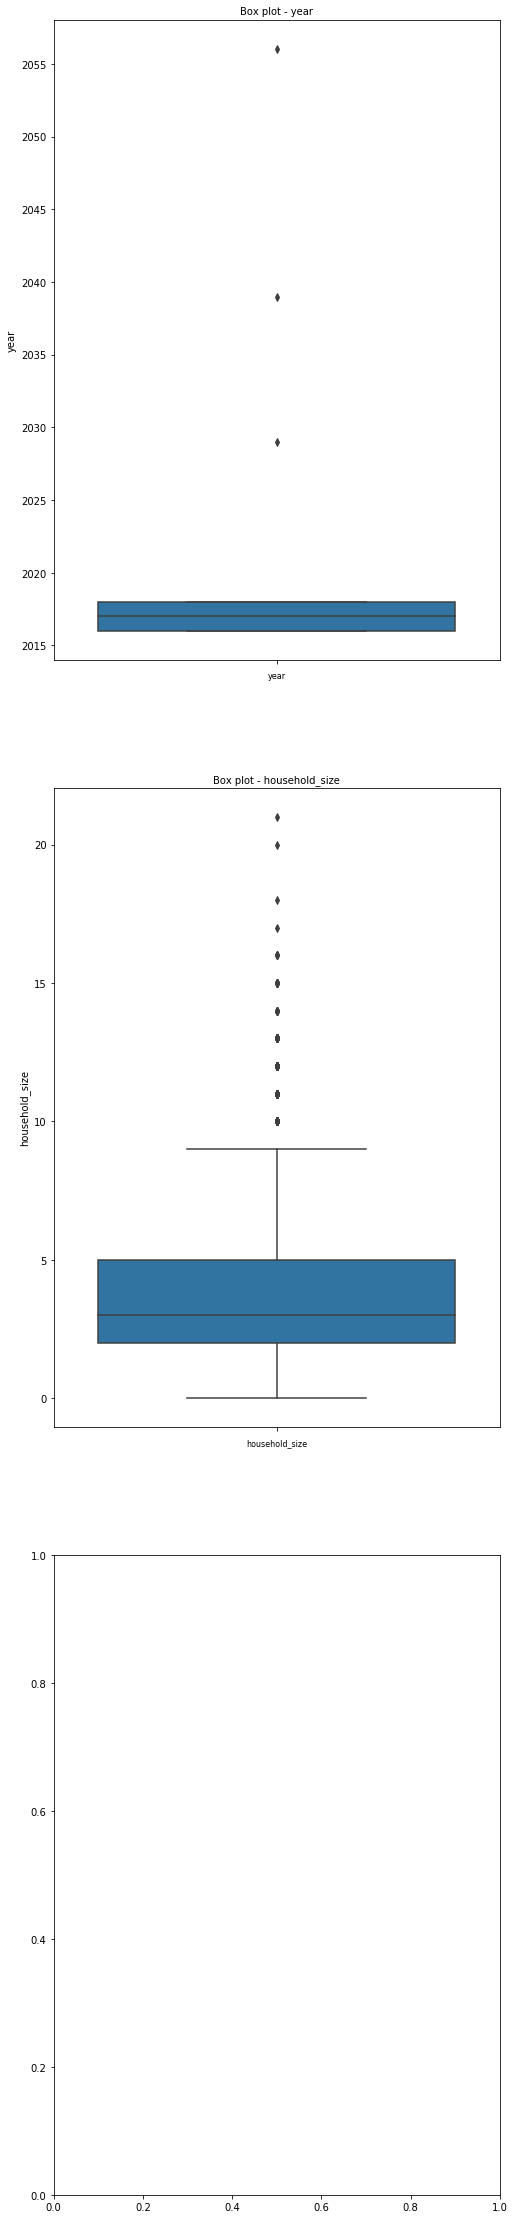

In [17]:
#checking for outliers
# Checking for Outliers
#
col_names = ['year','household_size', 'Respondent Age']
fig, ax = plt.subplots(len(col_names), figsize=(8,40))
for i, col_val in enumerate(col_names):
    
    sns.boxplot(y=financial_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()




In [18]:
## removing outliers
Q1 = financial_df.quantile(0.25)
Q3 = financial_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year               2.0
household_size     3.0
respondent age    23.0
dtype: float64


In [19]:
print(financial_df< (Q1 - 1.5 * IQR)) |(financial_df > (Q3 + 1.5 * IQR))

       cell phone access  country  gender_of_respondent  has a bank account  \
0                  False    False                 False               False   
1                  False    False                 False               False   
2                  False    False                 False               False   
3                  False    False                 False               False   
4                  False    False                 False               False   
...                  ...      ...                   ...                 ...   
23519              False    False                 False               False   
23520              False    False                 False               False   
23521              False    False                 False               False   
23522              False    False                 False               False   
23523              False    False                 False               False   

       household_size  level of educuation  marital

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [20]:
financial_new_df = financial_df[~((financial_df < (Q1 - 1.5 * IQR)) |(financial_df> (Q3 + 1.5 * IQR))).any(axis=1)]
financial_new_df.shape
financial_new_df

,country,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


#### anomalies

In [21]:
for i in financial_df.columns:
    print(i,financial_df[i].unique())
    print("%%%%%%%%")

country ['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
%%%%%%%%
year [2018 2029 2056 2016 2039 2017]
%%%%%%%%
has a bank account ['Yes' 'No' nan]
%%%%%%%%
type of location ['Rural' 'Urban' nan]
%%%%%%%%
cell phone access ['Yes' 'No' nan]
%%%%%%%%
household_size [ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
%%%%%%%%
respondent age [ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]
%%%%%%%%
gender_of_respondent ['Female' 'Male' nan]
%%%%%%%%
the relathip with head ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]
%%%%%%%%
mari

#### missing data

In [22]:
financial_new_df.isnull().sum()

country                   14
year                       0
has a bank account        36
type of location          15
cell phone access         11
household_size            27
respondent age            33
gender_of_respondent      33
the relathip with head     4
marital_status            31
level of educuation       29
type of job               30
dtype: int64

In [23]:
financial_new_df.dropna(inplace=True)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Analysis

1. **univariate analysis**

In [24]:
financial_new_df.sample()

,country,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
7422,Rwanda,2016,No,Rural,Yes,9.0,43.0,Female,Spouse,Married/Living together,Secondary education,Farming and Fishing


In [25]:
country=financial_new_df.groupby("country")

#### Distribution of bank accounts

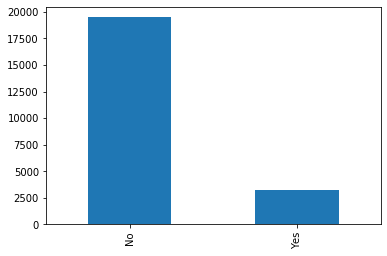

In [26]:
financial_new_df['has a bank account'].value_counts().head(10).plot.bar()


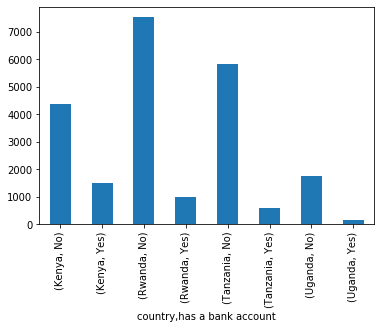

In [27]:
country['has a bank account'].value_counts().plot.bar()

#### level of educuation

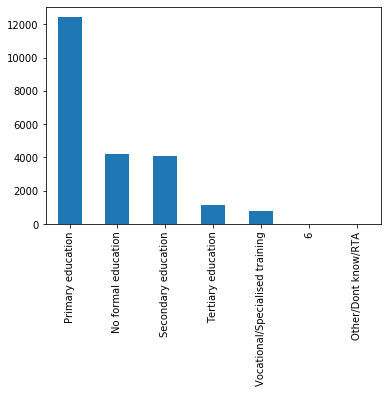

In [28]:
financial_new_df['level of educuation'].value_counts().plot.bar()


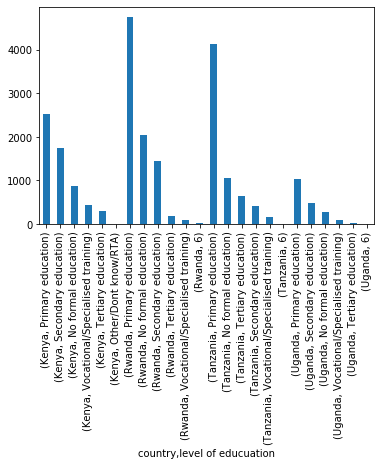

In [29]:
country['level of educuation'].value_counts().plot.bar()

#### type of job

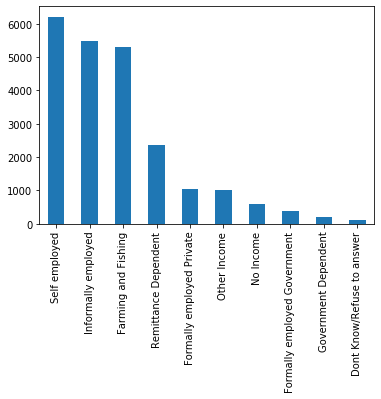

In [30]:
financial_new_df['type of job'].value_counts().head(10).plot.bar()


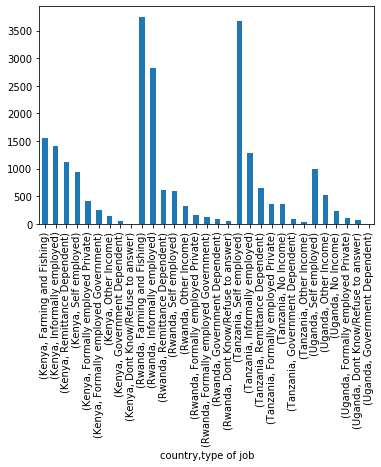

In [31]:
country['type of job'].value_counts().plot.bar()

### gender_of_respondent

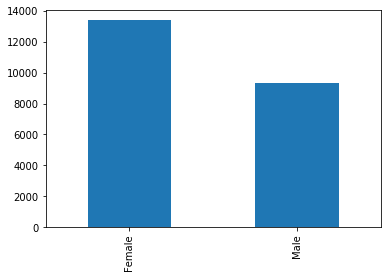

In [32]:
financial_new_df['gender_of_respondent'].value_counts().head(10).plot.bar()


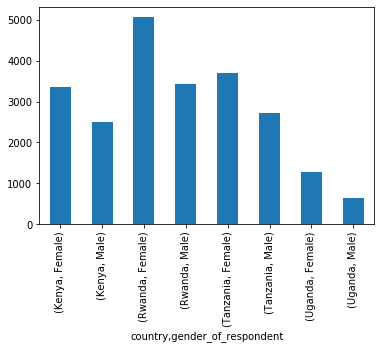

In [33]:
country['gender_of_respondent'].value_counts().plot.bar()

## type of location

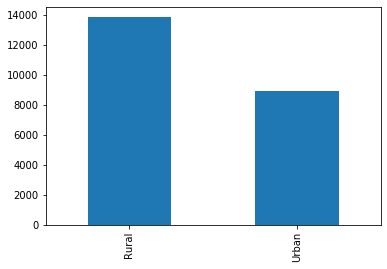

In [34]:

financial_new_df['type of location'].value_counts().head(10).plot.bar()

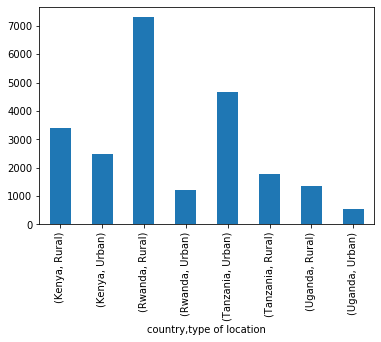

In [35]:
country['type of location'].value_counts().plot.bar()

## Age

<function matplotlib.pyplot.show(*args, **kw)>

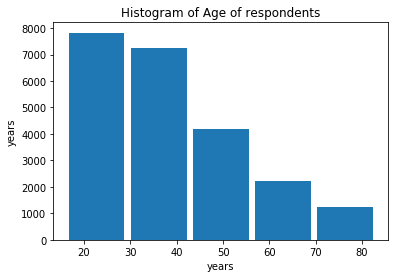

In [36]:
#country['respondent age'].value_counts().plot.hist()
age= financial_new_df['respondent age']

plt.hist(age, bins=5, histtype='bar', rwidth=0.9)
plt.xlabel('years')
plt.ylabel('years')
plt.title('Histogram of Age of respondents')
plt.show

In [37]:
financial_new_df['household_size'].mean()

3.57984598459846

In [38]:

financial_new_df['household_size'].mode()

0    2.0
dtype: float64

In [39]:

financial_new_df['household_size'].median()

3.0

In [40]:

financial_new_df['respondent age'].median()

35.0

In [41]:

financial_new_df['respondent age'].mean()

38.34798679867987

In [42]:

financial_new_df['respondent age'].mode()

0    30.0
dtype: float64

### Conclusions drawn from univariate analysis

1. Many respondents had no bank account
2. The highest level of education in all the countries was primary education
3. Many People were self employed
4. Many respondents stayed in the rural areas
5. Many respondents were aged between 20 to 30 and 30 to 40

## Bivariate Analysis

In [43]:
financial_new_df.head()

,country,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


### Relationship between having a bank account and level of education

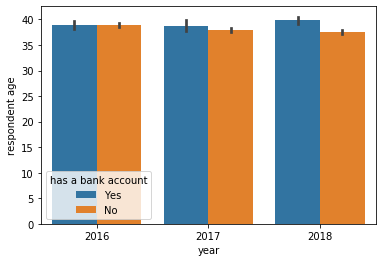

In [44]:
sns.barplot(x = 'year', y = 'respondent age', data = financial_new_df, hue = 'has a bank account')

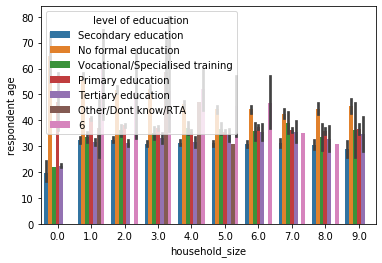

In [45]:
sns.barplot(x = 'household_size', y = 'respondent age', data = financial_new_df, hue = 'level of educuation')

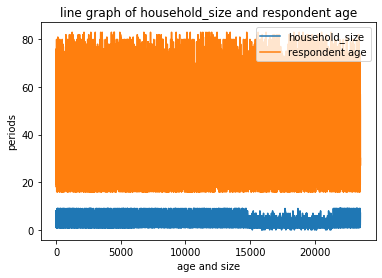

In [46]:
financial_new_df[['household_size', 'respondent age']].plot()
plt.title("line graph of household_size and respondent age")
plt.xlabel("age and size")
plt.ylabel("periods")
plt.show()

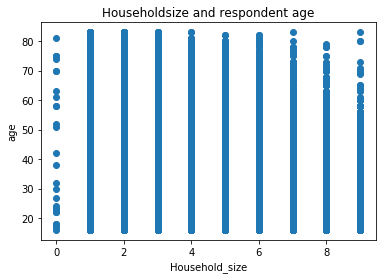

In [47]:
##Scatter plot to compare household size and respondent age
plt.scatter(financial_new_df["household_size"], financial_new_df["respondent age"])
plt.title("Householdsize and respondent age")
plt.xlabel("Household_size")
plt.ylabel("age")
plt.show()

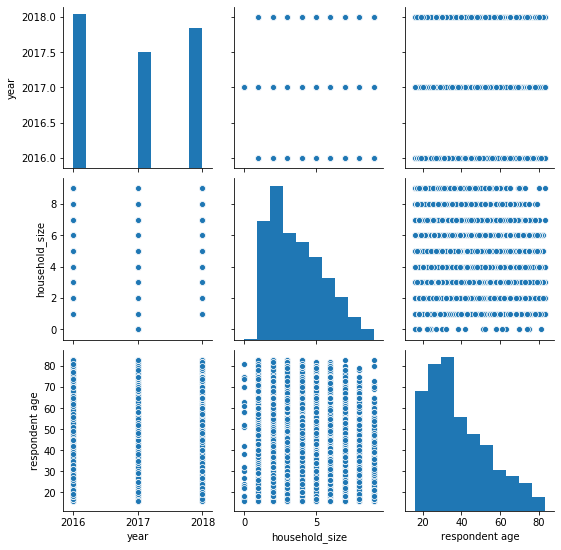

In [48]:
##Overview of relationship btn variables
sns.pairplot(financial_new_df)

In [49]:
## Correlation btn household_size and respondent age

# Calculating the pearson coefficient

pearson_coeff = financial_new_df["household_size"].corr(financial_new_df["respondent age"], method="pearson") 
print(pearson_coeff)
# Checking whether you have to define the pearson

coeff = financial_new_df["household_size"].corr(financial_new_df["respondent age"]) 
print(coeff)


-0.10620882169759861
-0.10620882169759861


In [54]:
## correlation between year and household_size
pearson_coeff = financial_new_df["year"].corr(financial_new_df["household_size"], method="pearson") 
print(pearson_coeff)
# Checking whether you have to define the pearson

coeff = financial_new_df["year"].corr(financial_new_df["household_size"]) 
print(coeff)

-0.09668379009974727
-0.09668379009974727


In [55]:
## correlation between year and respondent age
pearson_coeff = financial_new_df["year"].corr(financial_new_df["respondent age"], method="pearson") 
print(pearson_coeff)
# Checking whether you have to define the pearson

coeff = financial_new_df["year"].corr(financial_new_df["respondent age"]) 
print(coeff)

-0.02353778077729107
-0.02353778077729107


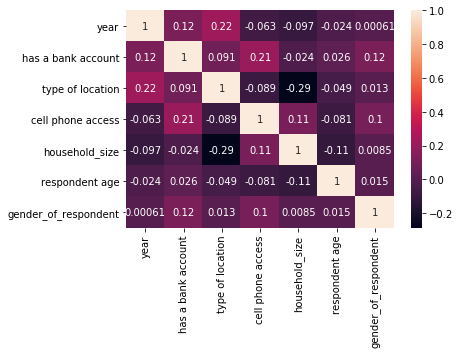

In [63]:
sns.heatmap(financial_new_df.corr(),annot=True)
plt.show()

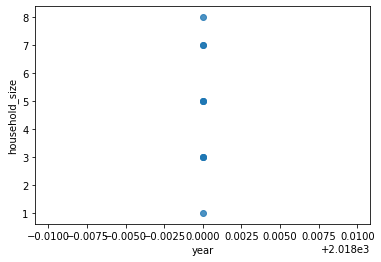

In [58]:
## Scatter plot of year and household_size

# Using the function regplot to create our scatterplot
sns.regplot(x = financial_new_df["year"].head(10), y = financial_new_df["household_size"].head(10), fit_reg=False)

## Conclusions from Biavarative analysis

1. There is weak  negative correlation of -0.1062088216975986 between household_size and respondent age
2. there is  a strong negative correlation between years and respondent age

#### Multivariate analysis

In [59]:
financial_new_df.head()

,country,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [60]:
def hasbankaccount(x):
    if x=="Yes":
        return 1
    else:
        return 0

def gender_respondent(x):
    if x=="Male":
        return 1
    else:
        return 0
    
def location_type(x):
    if x=="Urban":
        return 1
    else:
        return 0
    
def cellphone_access(x):
    if x=="Yes":
        return 1
    else:
        return 0
    
def phone_num(x):
    if x=="Yes":
        return 1
    else:
        return 0

In [61]:
financial_new_df['has a bank account']=financial_new_df['has a bank account'].apply(lambda x:hasbankaccount(x))
financial_new_df['gender_of_respondent']=financial_new_df['gender_of_respondent'].apply(lambda x:gender_respondent(x))
financial_new_df['type of location']=financial_new_df['type of location'].apply(lambda x:location_type(x))
financial_new_df['cell phone access']=financial_new_df['cell phone access'].apply(lambda x:cellphone_access(x))

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [62]:
financial_new_df.head()

,country,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
0,Kenya,2018,1,0,1,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,0,0,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,1,1,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,0,1,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,1,0,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


1. **factor analysis**

In [ ]:
# dropping unnecessary columns
financial_new_df.drop(['the relathip with head', 'marital_status', 'level of educuation', 'type of job'],axis=1,inplace=True)

In [78]:
financial_new_df.drop(['country'], axis=1,inplace=True)

/root/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
financial_new_df.drop(['country'], axis=1,inplace=True)

In [89]:
financial_new_df.drop(['year'], axis=1,inplace=True)

/root/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
#Adequacy test

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(financial_new_df)
chi_square_value, p_value
# In Bartlett ’s test, the p-value is 1. The test was not statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(946.4751379823143, 1.951583983645614e-192)

In [96]:
# Kaiser-Meyer-Olkin (KMO) Test

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(financial_new_df)

In [ ]:
#choosing number of factors
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(financial_new_df, 25, rotation=None)
# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev


In [ ]:
#scree plot
plt.scatter(range(1,financial_new_df.shape[1]+1),ev)
plt.plot(range(1,financial_new_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
## Performing Factor Analysis
fa = FactorAnalyzer()
fa.analyze(df, 6, rotation="varimax")
fa.loadings

In [ ]:
# Performing factor analysis for 5 factors
fa = FactorAnalyzer()
fa.analyze(financial_new_df, 5, rotation="varimax")
fa.loadings

In [ ]:
fa.get_factor_variance()
#  Noting total 34% cumulative Variance explained by the 5 factors.

3. **discriminant analysis.**

In [101]:

X = financial_new_df.iloc[:, 0:4].values
y = financial_new_df.iloc[:, 4].values

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [103]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
#: Peforming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [105]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [107]:
#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
#We can see that with one linear discriminant, the algorithm achieved an accuracy of 100%, 
# which is greater than the accuracy achieved with one principal component, which was 10.76%.

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.010764262648008612


#### Solution challenges and future insights

1. The solution is okay maybe more training data and maybe more data should be provided for the model to be accurate
2. The data was okay and almost had everything making our modelling work easier
3. Currently we dont need any dataset from  nowhere